In [1]:
import pandas as pd

df_train = pd.read_csv('train_kwh.csv')
df_train_SOLA01 = df_train['SOLA01']

In [2]:
df_train_SOLA01 = df_train_SOLA01[df_train_SOLA01 > 0]
df_train_SOLA01 = df_train_SOLA01.reset_index(drop=True)

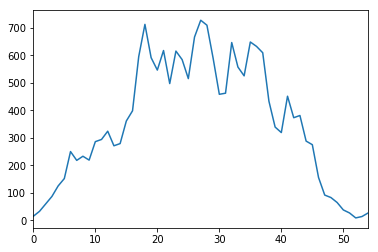

In [11]:
import matplotlib.pyplot as plt
df_train_SOLA01_55 = df_train_SOLA01[:55]
df_train_SOLA01_55.plot()
plt.show()

In [23]:
import statsmodels.api as sm
import numpy as np

t_data = df_train_SOLA01_55 - df_train_SOLA01_55.mean()
t_data = t_data.as_matrix()
x = np.arange(len(t_data))
x = x.T
t_data = t_data.T
nsample = x.size
X = np.column_stack((np.repeat(1, nsample), x, x**2))
model = sm.OLS(t_data, X)

In [24]:
results = model.fit()
# 結果の概要を表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     168.9
Date:                Thu, 09 Nov 2017   Prob (F-statistic):           1.81e-23
Time:                        12:28:09   Log-Likelihood:                -320.07
No. Observations:                  55   AIC:                             646.1
Df Residuals:                      52   BIC:                             652.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -422.3616     32.705    -12.914      0.0

In [25]:
a,b, c = results.params

# グラフで表示
plt.plot(x, t_data, 'o')
plt.plot(x, a+b*x+c*x**2)

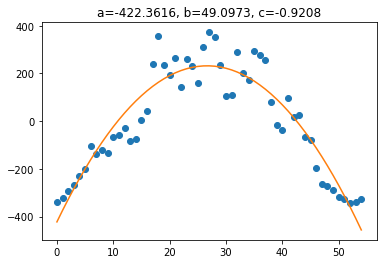

In [26]:
plt.title("a={:.4f}, b={:.4f}, c={:.4f}".format(a,b,c))
plt.show()

In [27]:
print(a+b*x+c*x**2)

[-422.36158578 -374.18504595 -327.85002601 -283.35652596 -240.70454581
 -199.89408556 -160.9251452  -123.79772473  -88.51182416  -55.06744348
  -23.4645827     6.29675819   34.21657918   60.29488028   84.53166149
  106.9269228   127.48066421  146.19288573  163.06358736  178.09276909
  191.28043092  202.62657286  212.13119491  219.79429706  225.61587932
  229.59594168  231.73448415  232.03150673  230.4870094   227.10099219
  221.87345508  214.80439807  205.89382117  195.14172438  182.54810769
  168.11297111  151.83631463  133.71813826  113.75844199   91.95722583
   68.31448977   42.83023382   15.50445797  -13.66283777  -44.6716534
  -77.52198893 -112.21384436 -148.74721968 -187.12211489 -227.33853
 -269.396465   -313.2959199  -359.0368947  -406.61938938 -456.04340396]
